<a href="https://colab.research.google.com/github/krishnamanc/Pytorch/blob/main/2_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# neural network in pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
# Create a Model Class that inherits nn.Module
class Model(nn.Module):
  # Input layer (4 features of the flower) ->
  # hidden layer1 ->
  # hidden layer2 ->
  # Output (3 classes of iris flowers)

  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() # instantiate our nn.module
    self.fc1 = nn.Linear(in_features,h1)
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2, out_features)

  # function for moving forward

  def forward(self,x):
    # relu -- if more than 0, as it is, if less than 0 it is 0
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

In [3]:
# for first random value (randomization)
torch.manual_seed(42)

In [4]:
# Create an instance of model
model = Model()

In [5]:
# import data
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

In [7]:
my_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [8]:
my_df.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [9]:
# Change last column from strings to integers
my_df['variety'] = my_df['variety'].replace('Setosa', 0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1)
my_df['variety'] = my_df['variety'].replace('Virginica', 2)

In [10]:
my_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
# Data, Set X, y
X = my_df.drop('variety', axis=1) # since it is a column, we put axis = 1
y = my_df['variety']

In [12]:
X.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: variety, dtype: int64

In [14]:
# Convert these to numpy arrays
X = X.values
y = y.values

In [15]:
X.dtype

dtype('float64')

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
# Train Test Split!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [19]:
# Convert y labels to long tensors (integers)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [20]:
X_train.dtype

torch.float32

In [21]:
y_train.dtype

torch.int64

In [22]:
# Set the criterion of model to measure the error (Loss)
# how far off the predictions are from the data
loss_fn = nn.CrossEntropyLoss()
# Choose Adam Optimizer, lr = learning rate(if error doesn't go down after some epochs, reduce learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
# one epoch means, one forward pass through the neural network

In [23]:
for param in model.parameters():
    print(type(param), param.size())

<class 'torch.nn.parameter.Parameter'> torch.Size([8, 4])
<class 'torch.nn.parameter.Parameter'> torch.Size([8])
<class 'torch.nn.parameter.Parameter'> torch.Size([9, 8])
<class 'torch.nn.parameter.Parameter'> torch.Size([9])
<class 'torch.nn.parameter.Parameter'> torch.Size([3, 9])
<class 'torch.nn.parameter.Parameter'> torch.Size([3])


In [32]:
#  Train our model!
# Epochs? (one run through all the training data in our network)
epochs = 10000
losses =[]
for epoch in range(epochs):
  # call model.train
  model.train()

  #1. Do the forward pass
  y_pred = model(X_train)

  #2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  losses.append(loss.detach().numpy())

  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. loss backward
  loss.backward()

  #5. optimizer step
  optimizer.step()

  ### Test time!
  # call model.eval

  model.eval()

  with torch.inference_mode():
    # Do the forward pass
    test_pred = model(X_test)

    # Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

    if epoch % 1000  == 0:
      # print out what's happening
      print(f"Epoch: {epoch} | Train loss: {loss:.4f} | Test loss: {test_loss:.4f}")


Epoch: 0 | Train loss: 0.0466 | Test loss: 0.0153
Epoch: 1000 | Train loss: 0.0466 | Test loss: 0.0153
Epoch: 2000 | Train loss: 0.0466 | Test loss: 0.0153
Epoch: 3000 | Train loss: 0.0466 | Test loss: 0.0153
Epoch: 4000 | Train loss: 0.0466 | Test loss: 0.0153
Epoch: 5000 | Train loss: 0.0466 | Test loss: 0.0153
Epoch: 6000 | Train loss: 0.0466 | Test loss: 0.0153
Epoch: 7000 | Train loss: 0.0466 | Test loss: 0.0153
Epoch: 8000 | Train loss: 0.0466 | Test loss: 0.0153
Epoch: 9000 | Train loss: 0.0466 | Test loss: 0.0153


Text(0.5, 0, 'Epoch')

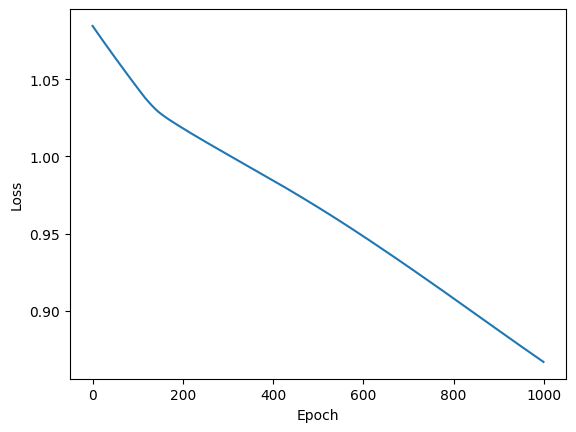

In [25]:
# Graph it out!
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [33]:
loss

tensor(0.0466, grad_fn=<NllLossBackward0>)

In [34]:
test_loss

tensor(0.0153)

In [50]:
correct = 0
print(f'      prediction \t \t \t     test data \t predicted data')
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model(data)

    # Will tell us what type of flower class our network thinks it is
    print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t   {y_val.argmax().item()}')

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f'We got {correct} correct!')

      prediction 	 	 	     test data 	 predicted data
1.) tensor([-27.8880,  14.9140,   5.8254]) 	 1 	   1
2.) tensor([ 27.4370,   4.2817, -16.7505]) 	 0 	   0
3.) tensor([-81.1001,   9.2366,  34.4975]) 	 2 	   2
4.) tensor([-30.1836,  13.8266,   7.5416]) 	 1 	   1
5.) tensor([-33.7566,  15.0666,   8.6080]) 	 1 	   1
6.) tensor([ 25.5147,   4.1284, -15.6728]) 	 0 	   0
7.) tensor([-14.6651,  14.6320,  -0.4938]) 	 1 	   1
8.) tensor([-52.6748,  11.2494,  19.8274]) 	 2 	   2
9.) tensor([-36.4845,  12.9077,  10.9995]) 	 1 	   1
10.) tensor([-18.1198,  15.3227,   0.9121]) 	 1 	   1
11.) tensor([-45.5650,  12.1130,  15.9197]) 	 2 	   2
12.) tensor([ 24.9368,   3.5452, -15.0594]) 	 0 	   0
13.) tensor([ 27.8349,   3.9260, -16.7648]) 	 0 	   0
14.) tensor([ 25.2904,   3.5916, -15.2675]) 	 0 	   0
15.) tensor([ 27.2950,   3.8551, -16.4471]) 	 0 	   0
16.) tensor([-31.5204,  14.3314,   7.9697]) 	 1 	   1
17.) tensor([-60.2704,   9.8697,  24.1583]) 	 2 	   2
18.) tensor([-17.7220,  15.0746,   0.

In [51]:
# tensor([0,1,2])
# highest number in 1st column mean, model is predicting flower belongs to 1

In [52]:
# add new data sepal.length	sepal.width	petal.length	petal.width	 -> variety
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [65]:
def predictanswer(yourmodel, datain):
  with torch.no_grad():
    answer = yourmodel(datain)
    print(answer)

  if answer.argmax().item() == 0:
    output = "Setosa"
  elif answer.argmax().item() == 1:
    output = "Versicolor"
  else:
    output = "Virginica"

  print(output)

In [66]:
predictanswer(model,new_iris)

tensor([ 25.2236,   3.5829, -15.2282])
Setosa


In [67]:
# 6.7	3.0	5.2	2.3	Virginica
predictanswer(model,torch.tensor([6.7,3.0,5.2,2.3]))

tensor([-54.6492,  10.5862,  21.1082])
Virginica


In [68]:
predictanswer(model,torch.tensor([5.9,3.0,5.1,1.0]))

tensor([-27.2249,  15.2923,   5.2896])
Versicolor


In [69]:
# 4.7	3.2	1.3	0.2	Setosa
predictanswer(model,torch.tensor([4.7,3.2,1.3,0.2]))

tensor([ 25.2236,   3.5829, -15.2282])
Setosa


In [60]:
# Save our NN Model
torch.save(model.state_dict(), 'irismodel.pt')

In [61]:
# Load the Saved Model
new_model = Model()

In [62]:
new_model.load_state_dict(torch.load('irismodel.pt'))

<All keys matched successfully>

In [64]:
model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [63]:
# check loaded model
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [71]:
# 6.7	3.0	5.2	2.3	Virginica
predictanswer(new_model,torch.tensor([6.7,3.0,5.2,2.3]))

tensor([-54.6492,  10.5862,  21.1082])
Virginica
